In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('dataset.csv')
df.describe()

,Matrix,Eigenvalues
count,1440,1440
unique,1440,1440
top,"[[46, 45], [45, 53]]","[4.364094115659981, 94.63590588434002]"
freq,1,1


In [30]:
df['Eigenvalues'] = df['Eigenvalues'].apply(eval)

In [31]:
eigenvalues_df = pd.DataFrame(df['Eigenvalues'].tolist())
eigenvalues_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
count,1440.000000,1440.000000,1410.000000,1380.000000,1350.000000,1320.000000,1290.000000,1260.000000,1230.000000,1200.000000,...,300.000000,270.000000,240.000000,210.000000,180.000000,150.000000,120.000000,90.000000,60.000000,30.000000
mean,1274.786950,1.887082,-8.152618,-5.151644,-1.702835,1.258842,-9.646186,1.537143,4.381760,0.926301,...,1.530765,-1.076784,0.037685,-1.772564,-2.229227,-2.518702,-3.212586,-7.899889,-5.840881,-13.660281
std,692.085008,189.259593,177.014695,168.464737,161.028832,154.442667,147.531368,141.854170,137.895317,132.618945,...,36.804901,36.770385,37.129920,36.352292,38.695903,36.697380,35.232396,34.317448,34.654125,31.309684
min,-64.409977,-313.311879,-274.384324,-261.594358,-266.351782,-254.278121,-245.545226,-234.302404,-229.651642,-222.650386,...,-106.499867,-100.985107,-91.871383,-106.175762,-94.477111,-100.994141,-66.759407,-72.933096,-68.341677,-63.906254
25%,678.602392,-183.414540,-179.351724,-169.211739,-159.917663,-150.546040,-150.398702,-135.389969,-131.468177,-124.623456,...,-21.072438,-23.581803,-27.030558,-26.133733,-30.007866,-29.695757,-31.870744,-34.337035,-33.682160,-43.493794
50%,1270.523215,12.970230,-38.507157,-8.301766,4.026843,3.496919,-25.111074,5.576011,4.767191,-3.291001,...,2.017678,-3.027082,-1.268840,-1.157637,-2.091682,-4.988599,-5.220117,-9.967782,-3.814408,-12.975118
75%,1873.582523,186.290124,171.782861,162.924181,156.783462,147.318554,135.501688,141.089714,136.780803,128.932099,...,26.058481,26.281297,26.876318,22.929662,25.380035,21.776356,24.009005,17.423736,15.263331,11.292872
max,2487.949724,293.009510,276.718739,269.861002,260.739733,249.323209,257.678019,240.329984,241.938779,228.167593,...,118.992757,84.957660,77.805606,96.191198,107.427060,101.599465,94.908147,85.695078,84.488536,54.959206


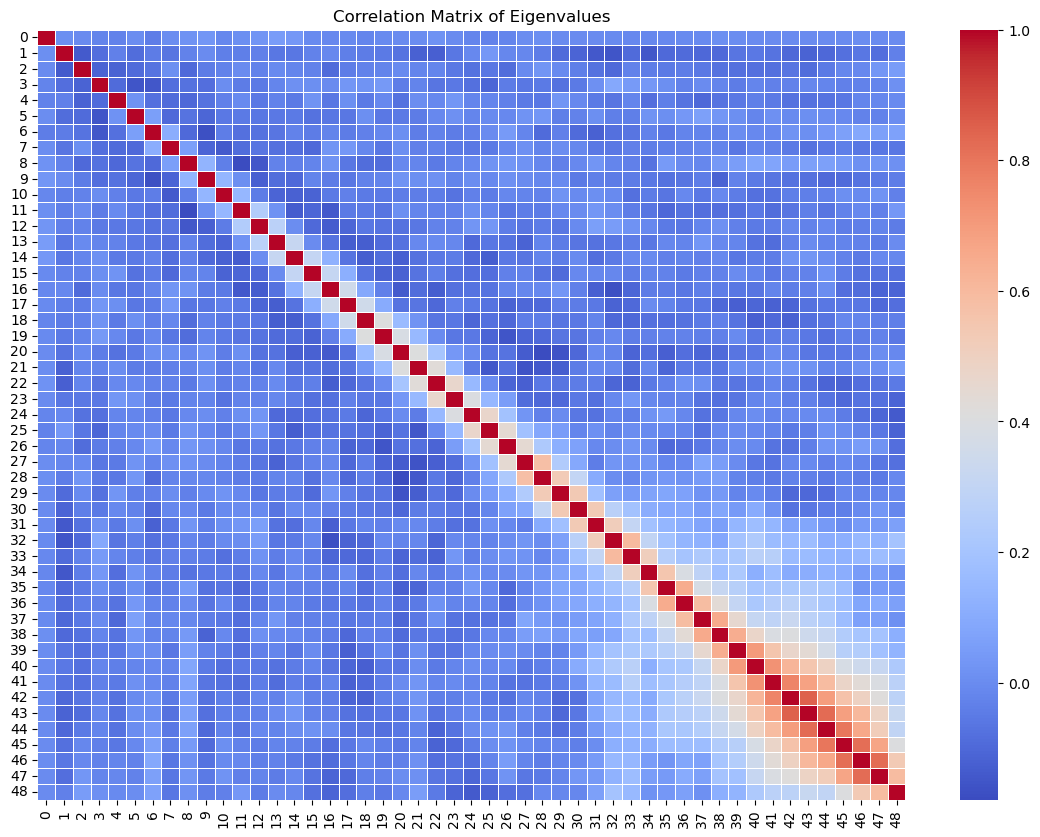

In [40]:
correlation_matrix = eigenvalues_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Eigenvalues')
plt.show()

In [35]:
from sklearn.decomposition import PCA

# Handle NaN values by filling them with the mean of the column
eigenvalues_df = eigenvalues_df.fillna(eigenvalues_df.mean())

# Perform PCA on the eigenvalues
pca = PCA(n_components=2)
principal_components = pca.fit_transform(eigenvalues_df)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df.describe()

,PC1,PC2
count,1.440000e+03,1.440000e+03
mean,4.042199e-14,7.973868e-15
std,6.922002e+02,1.978334e+02
min,-1.338765e+03,-4.301643e+02
25%,-5.958847e+02,-1.208981e+02
50%,-4.252957e-01,1.484341e+01
75%,5.998865e+02,1.249718e+02
max,1.219835e+03,4.222802e+02


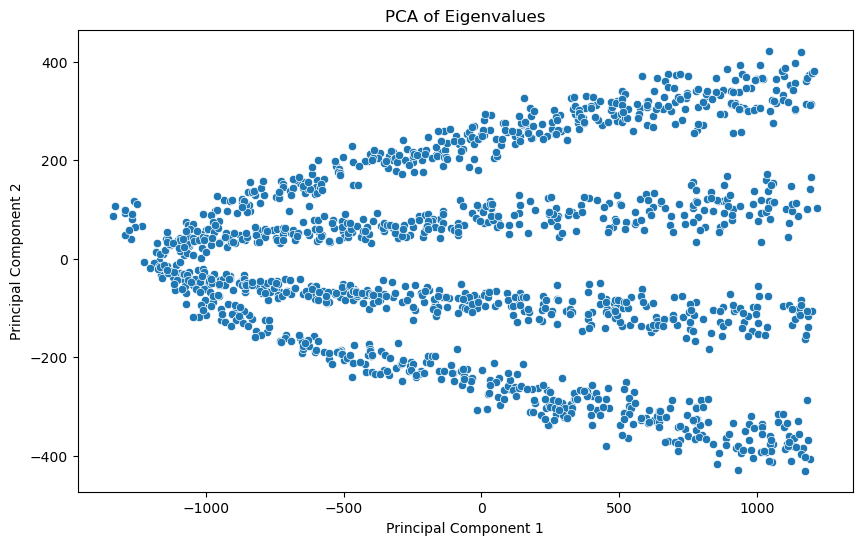

In [36]:
# Visualize the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA of Eigenvalues')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

C:\Users\eserize\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


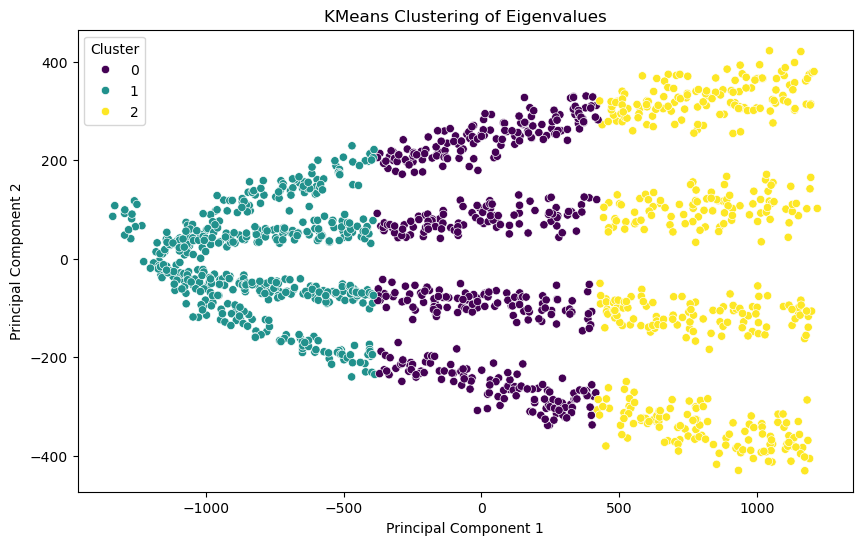

In [37]:
from sklearn.cluster import KMeans

# Perform KMeans clustering on the eigenvalues
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(eigenvalues_df)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('KMeans Clustering of Eigenvalues')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()